In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Titanic dataset notebook

This notebook contains my take on the titanic dataset machine learning competition from kaggle!
Lets start by reading the train data and test data provided by the website.

In [182]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')
pd.set_option('max_columns', None)  # makes all columns visible on print

print(train_data)  # 12 columns total: with Survived being the dependent variable

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [183]:
helper = ['n', 'c', 'c', 'c', 'c', 'n', 'n', 'n',
          'n', 'n', 'c', 'c']  # n = numeric variable
# c = categorical variable (created using kaggles description of each variable)
train_data.isna().any()
# Age, Cabin and Embarked columns contains missing values

print(train_data["Age"].isna().value_counts())  # 177 missing values
print(train_data["Cabin"].isna().value_counts())  # 687 missing values
print(train_data["Embarked"].isna().value_counts())  # 2 missing values

False    714
True     177
Name: Age, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64
False    889
True       2
Name: Embarked, dtype: int64


24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
C95            1
A34            1
E58            1
D21            1
B101           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Total rows for col age: 712


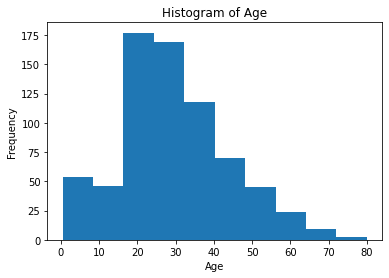

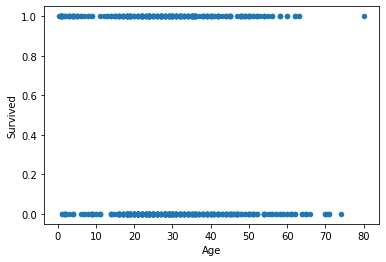

In [184]:
# Investigating these 3 variables a little bit further:

print(train_data["Age"].value_counts())
print(train_data["Cabin"].value_counts())
print(train_data["Embarked"].value_counts())

# Plot somewhat resembles a gamma distribution
plt.hist(train_data["Age"])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

train_data.plot.scatter(x='Age', y='Survived')

# Age information has a lot of missing values aswell, but seems a variable worth
# testing how much it explains the "Survived" column. First test will be made
# removing all the NaNs from Age.

# Cabin information is weird. There are sometimes more than 1 cabin per person
# and has a lot of missing values. For now we'll proceed without it.

del train_data["Cabin"]
train_data

# Dropped all missing values from age and embarked
train_data.dropna(inplace=True)
print("Total rows for col age:",
      len(train_data["Age"]))  # total has been reduced by 179 (177 + 2)

# Embarked information seems it could be useful, will keep it

Now that we have removed all missing values, we'll analyze the remaining variables

0.6521739130434783 people from the class 1 survived out of a total 184
0.4797687861271676 people from the class 2 survived out of a total 173
0.23943661971830985 people from the class 3 survived out of a total 355
0.2052980132450331 people from the sex male survived out of a total 453 passengers 
0.752895752895753 people from the sex female survived out of a total 259 passengers 


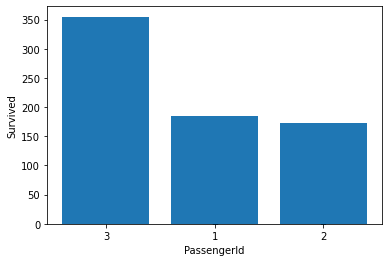

In [185]:
# Passenger ID will be maintained because the order that the passengers were
# added to the database may have something to do with their likelihood of survival.

# By looking at the scatterplot, it doesn't seem to be the case though.
train_data.plot.scatter(x="PassengerId", y="Survived")

# Survived column is of course our variable of interest and dependent variable
# and will be used in the models that we'll test.
# print(train_data['Survived'].value_counts())  # 342 survived and 549 didnt

# Pclass column has information about the social economic status of the passenger.
# Doing some quick analysis:
classes = []

for i in range(1, 4):
    classes.append(train_data[train_data['Pclass'] == i].iloc[:, 1:3])
    print(
        f"{sum(classes[i-1]['Survived'])/len(classes[i-1]['Survived'])} people from the class {i} survived out of a total {len(classes[i-1]['Survived'])}"
    )

plt.bar(train_data['Pclass'].value_counts().keys().astype(str),
        train_data['Pclass'].value_counts())

# 63%, 47.2% and 24.2% are the percentage of people who survived in the classes
# 1, 2 and 3 respectively. This tells us that the passengers with the highest
# level of socio-economic status appear to have a higher chance of survival

# Name column probably wont help us much here because if we take full names into consideration,
# almost 100% of them would be unique. We could reduce the feature # to first name, last name or something like that but even then we might still
# have way too many unique names. For now,  we'll move on without this feature.
del train_data["Name"]

In [186]:
# Sex:
sexes = []

sex = ["male", 'female']
for i in range(0, 2):
    sexes.append(train_data[train_data['Sex'] == sex[i]].iloc[:, ])
    print(
        f"{sum(sexes[i]['Survived'])/len(sexes[i]['Survived'])} people from the sex {sex[i]} survived out of a total {len(sexes[i]['Survived'])} passengers "
    )

# It seems 74% of the female passengers survived versus 19% of the male passengers.
# this variable will probably be responsible for explaining a lot of the survivors

# Ticket column seems a bit weird to me. Some rows have a string mixed up with
# the ticket number. Could try removing those string parts and use only the numeric
# part but for now i will exclude this variable and see how the model fares

0.2052980132450331 people from the sex male survived out of a total 453 passengers 
0.752895752895753 people from the sex female survived out of a total 259 passengers 


**Cabin** column at first glance has lots of missing values and probably wont help much in our analysis, so it was removed.

**Name** has way too many classes and wont help us explain the data.


